In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np

import math

In [0]:
filtersize=1
numoffilter=16

filtersize2 = 5          
numoffilters2 = 36

fc_size = 128        

In [0]:
from mnist import MNIST

In [0]:
data = MNIST()

In [0]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
#reshaping the data

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train=x_train.reshape(x_train.shape[0],28,28,1)
input_shape=(28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [31]:
#creating the Convulation Neural Net

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model=Sequential()
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 44s 741us/step - loss: 0.1988 - acc: 0.9407
Epoch 2/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0819 - acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0582 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.0468 - acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 46s 760us/step - loss: 0.0348 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0302 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0239 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0215 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0209 - acc: 0.9927
Epoch 10/10
60000/60000 [=========

5


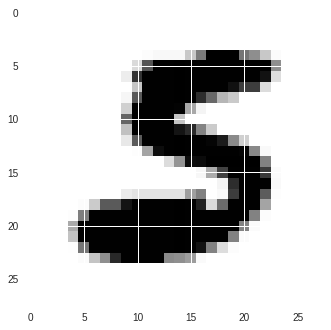

In [36]:

image_index = 7777
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())